In [4]:
!git pull origin

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), 1000 bytes | 0 bytes/s, done.
From https://github.com/naiaseh/Trunk
   d11251d..82c31d7  main       -> origin/main
Updating d11251d..82c31d7
Fast-forward
 PinnNew/modules/models.py | 56 +++++++++++++++++++++++++++++++++++++++++++++--
 1 file changed, 54 insertions(+), 2 deletions(-)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
  !git config --global user.email "naiaseh@uwo.com"
  !git config --global user.name "Nadia Aiaseh"

In [2]:
import os
os.chdir("/content/drive/MyDrive/Trunk/PinnNew")
print(os.getcwdb())

b'/content/drive/MyDrive/Trunk/PinnNew'


In [3]:
from modules.models import KPPinn, create_dense_model, create_dense_model_Normalized, FourierFeatures
from modules.data import simulate_KP
from modules.plots import plot_KdV_model, plot_training_loss
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
k=6
c= 3.23
phi = 0



def boundary_function(txy):
    return phi*tf.ones_like(txy[:, 1:2])




In [5]:
### KPII ###

### original single-soliton phi-fcn ###
# def phi_function(txy):
#     angle_y_axis = (-30*np.pi/180)
#     offset =  +12
#     lamb = 2*tf.tan(angle_y_axis)
#     kappa = tf.sqrt(c/4)
#     ksi = txy[:, 1:2] + lamb*txy[:,2:3] - (c+3*lamb**2) * txy[:,0:1] + offset
#     u = c / (2*tf.cosh(kappa*(ksi))**2)+phi
#     u = tf.where(tf.math.is_nan(u), 0., u)
#     angle_y_axis2 = (30*np.pi/180)
#     offset2 =  0
#     lamb2 = 2*tf.tan(angle_y_axis2) # if this is negative it'll be CW
#     kappa2 = tf.sqrt(c2/4)
#     ksi2 = txy[:, 1:2] + lamb2*txy[:,2:3] - (c2+3*lamb2**2) * txy[:,0:1] + offset2 # fixed a bug here
#     u2 = c2 / (2*tf.cosh(kappa2*(ksi2))**2)
#     u2 = tf.where(tf.math.is_nan(u2), 0., u2)
#     return u + u2

### NOTES ####
# c/2 = 2k^2
# lamb = 2*tf.tan(angle_y_axis) where angle_y_axis is CCW from the positive y axis.

x_start =  -20. #-10
length = 20.#10
y_start = x_start
ylength = length
time = 3
def phi_function(txy):

  k1 = 1/2
  k2 = 1/2
  c = k1**2*4
  c2 = k2**2*4
  k3 = np.sqrt(2.8/4)
  angle_y_axis = (60.*np.pi/180)
  angle_y_axis2 = (60.*np.pi/180)
  angle_y_axis3 = (0.*np.pi/180)
  offset =  0.
  offset2 =  0.
  offset3 =  +12.
  lamb = 2/3 # if this is negative it'll be CW
  lamb2 = -2/3
  lamb3 = 2.*tf.tan(angle_y_axis2)
  eta1 = k1*(txy[:, 1:2] + lamb*txy[:,2:3] - (k1**2+3*lamb**2) * txy[:,0:1])+ offset
  eta2 = -k2*(txy[:, 1:2] + lamb2*txy[:,2:3] - (k2**2+3*lamb2**2) * txy[:,0:1]) + offset2
  eta3 = k3*(txy[:, 1:2] + lamb3*txy[:,2:3] - (k3**2+3*lamb3**2) * txy[:,0:1]) + offset3


  eA12 =( (k1-k2)**2 - (lamb-lamb2)**2)/((k1+k2)**2 - (lamb-lamb2)**2)
  eA23 =( (k2-k3)**2 - (lamb2-lamb3)**2)/((k2+k3)**2 - (lamb2-lamb3)**2)

  deriv_term1 = (k1**2 * tf.math.exp(eta1) + k2**2 * tf.math.exp(eta2) + eA12 * (k1+k2)**2 * tf.math.exp(eta1+eta2)) / (1 + tf.math.exp(eta1) + tf.math.exp(eta2) + eA12 * tf.math.exp(eta1+eta2))
  deriv_term2 = (k1 * tf.math.exp(eta1) + k2 * tf.math.exp(eta2) + eA12 * (k1+k2) * tf.math.exp(eta1+eta2))**2 / (1 + tf.math.exp(eta1) + tf.math.exp(eta2) + eA12 * tf.math.exp(eta1+eta2))**2

  u2 = 2*(deriv_term1 - deriv_term2)
  u2 = tf.where(tf.math.is_nan(u2), 0., u2)

  return u2


### KPI ###

# def phi_function(txy):


#     lamb = 0
#     mu = 1
#     kappa = tf.sqrt(c/4) # c/2 = 2k^2
#     numer = -(txy[:, 1:2] + lamb*txy[:,2:3] + 3*(lamb**2-mu**2) * txy[:,0:1])**2 + mu**2 * (txy[:,2:3] + 6*lamb*txy[:,0:1])**2 + 1/mu**2
#     denom = ((txy[:, 1:2] + lamb*txy[:,2:3] + 3*(lamb**2-mu**2) * txy[:,0:1])**2 + mu**2 * (txy[:,2:3] + 6*lamb*txy[:,0:1])**2 + 1/mu**2)**2
#     u = numer/denom
#     u = tf.where(tf.math.is_nan(u), 0., u)
#     return u
# x_start =  -10. #-10
# length = 10.#10
# y_start = -10
# ylength = 10
# time =  3

(10000, 3)


Text(0.5, 1.0, 'wave cross section at y = 0')

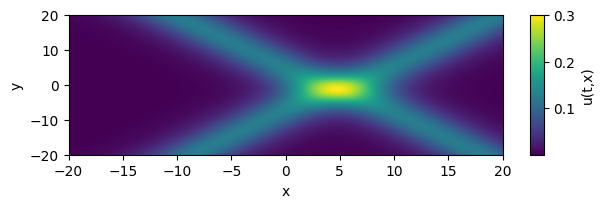

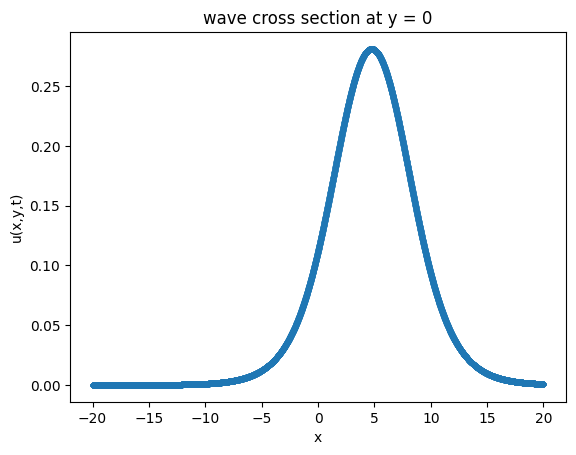

In [6]:
from matplotlib.gridspec import GridSpec
N = 1000
TIME = 3
xt = np.linspace(-20,20,N).T
yt = np.linspace(y_start,ylength,N).T
tt = np.zeros((N,1))
xt = xt.reshape(-1,1)
yt = yt.reshape(-1,1)
tt = tt.reshape(-1,1)

txy_test = np.c_[tt,xt,yt]
print(txy_test.shape)
txy_test = tf.convert_to_tensor(txy_test, dtype = 'float32')
txy_test = tf.reshape(txy_test, [N,3])

x, y = np.meshgrid(xt, yt)
txy = np.stack([np.full(x.flatten().shape, TIME), x.flatten(), y.flatten()],axis=-1)
fig = plt.figure(figsize=(7,4))

gs = GridSpec(2, 5)
plt.subplot(gs[0, :])

ut = phi_function(txy)
ut = tf.reshape(ut, [x.shape[0],x.shape[1]])
plt.pcolormesh(x, y, ut)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar(pad=0.05, aspect=10)
cbar.set_label('u(t,x)')
cbar.mappable.set_clim( tf.reduce_min(ut), tf.reduce_max(ut))

fig = plt.figure()

cross_sect = 0
txy2 = np.stack([np.full(tt.shape, TIME),  xt , np.full(tt.shape, cross_sect)], axis=1)
u2 = phi_function(txy2)
u2 = tf.reshape(u2, [xt.shape[0],xt.shape[1]])
plt.plot(xt, u2, '.',label = 'exact at time {}'.format(0))

plt.xlabel('x')
plt.ylabel('u(x,y,t)')
plt.title('wave cross section at y = {}'.format(cross_sect))

In [7]:
### Plotting some test function in Fourier space ###
# # N = 6000
# x_flat = np.linspace(-20,20,N)
# Sin = np.sin(np.pi*x_flat) + 1/2*np.sin(np.pi*25*x_flat) + 1/3*np.sin(np.pi*50*x_flat) + 1/4*np.sin(np.pi*60*x_flat)
# kappa2= 2*np.pi/(40*np.pi)*np.arange(-N/2,N/2,1) # define frequencies, from -N/2 to N/2, from negative to positive
# kappa3=np.fft.fftshift(kappa2)
# Sin_fft = tf.signal.fft(tf.cast(u2, tf.complex128))
# # Sin_fft = tf.signal.fft(Sin)
# plt.semilogy( kappa3[1:N//2] , np.abs(Sin_fft)[1:N//2],'.') # index for positive coefficients

# plt.xlabel('frequency (k)')
# plt.ylabel('$F_k$')

In [12]:
# when boundary function is set to None, the data will be collected from the phi_function but at boundary
(txy_eqn, u_eqn), (txy_init, u_phi), (txy_boundary_x, u_bnd_x), (txy_boundary_y, u_bnd_y), (x_bnd_left, x_bnd_right), (y_bnd_left, y_bnd_right)  = simulate_KP(100000, phi_function, None, time, x_start, length, y_start, ylength, n_bnds = None,\
                                                                                                                                                               n_init = None, random_seed = 42, dtype=tf.float32)

In [13]:
normalizer = tf.keras.layers.Normalization(axis=1)
normalizer.adapt(txy_eqn)
# normalizer = FourierFeatures(n_features=25, standard_dev = 5.)
# normalizer.build(input_shape=[3])


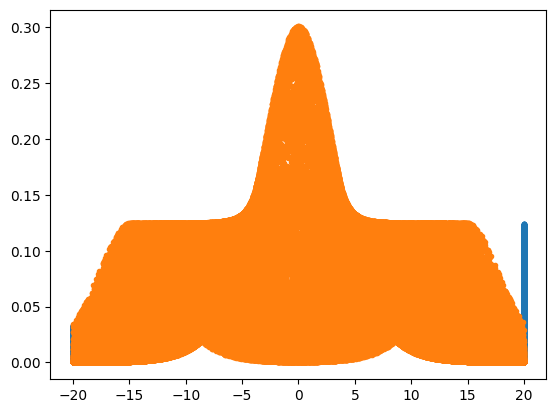

In [14]:
plt.plot(txy_boundary_x[:,1:2],u_bnd_x,'.')

plt.plot(txy_init[:,1:2],phi_function(txy_init),'.')

inputs = [txy_eqn, txy_init, txy_boundary_x, x_bnd_right, x_bnd_left, txy_boundary_y, y_bnd_right, y_bnd_left]
outputs = [phi_function(txy_eqn), u_eqn, u_phi, u_bnd_x, u_bnd_y]


In [15]:
### another network structure that worked well was [12, 24, 24, 24, 12] ###
backbone = create_dense_model_Normalized([ 128, 128, 128], activation='tanh', initializer='glorot_normal', \
    n_inputs=3, n_outputs=1, normalizer=normalizer)
pinn = KPPinn(backbone, k=6., sig_sq = +3., PBC_y = False)
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(1e-3, decay_steps=500, decay_rate=0.85)
optimizer = tf.keras.optimizers.Adam(learning_rate=scheduler, clipnorm=1.)
pinn.compile(optimizer=optimizer)

In [16]:
history = pinn.fit_custom(inputs, outputs, epochs = 40000, print_every = 500)

Epoch 0, Loss Residual: 0.0000, Loss Initial: 0.2847, Loss Boundary: 0.1073, Loss Boundary Y: 0.1411, MAE: 0.2791
Epoch 500, Loss Residual: 0.0000, Loss Initial: 0.0016, Loss Boundary: 0.0003, Loss Boundary Y: 0.0013, MAE: 0.0582
Epoch 1000, Loss Residual: 0.0000, Loss Initial: 0.0004, Loss Boundary: 0.0001, Loss Boundary Y: 0.0004, MAE: 0.0392
Epoch 1500, Loss Residual: 0.0000, Loss Initial: 0.0002, Loss Boundary: 0.0000, Loss Boundary Y: 0.0002, MAE: 0.0340
Epoch 2000, Loss Residual: 0.0000, Loss Initial: 0.0001, Loss Boundary: 0.0000, Loss Boundary Y: 0.0001, MAE: 0.0257
Epoch 2500, Loss Residual: 0.0000, Loss Initial: 0.0001, Loss Boundary: 0.0000, Loss Boundary Y: 0.0000, MAE: 0.0186
Epoch 3000, Loss Residual: 0.0000, Loss Initial: 0.0001, Loss Boundary: 0.0000, Loss Boundary Y: 0.0000, MAE: 0.0142
Epoch 3500, Loss Residual: 0.0000, Loss Initial: 0.0000, Loss Boundary: 0.0000, Loss Boundary Y: 0.0000, MAE: 0.0125
Epoch 4000, Loss Residual: 0.0000, Loss Initial: 0.0000, Loss Bounda

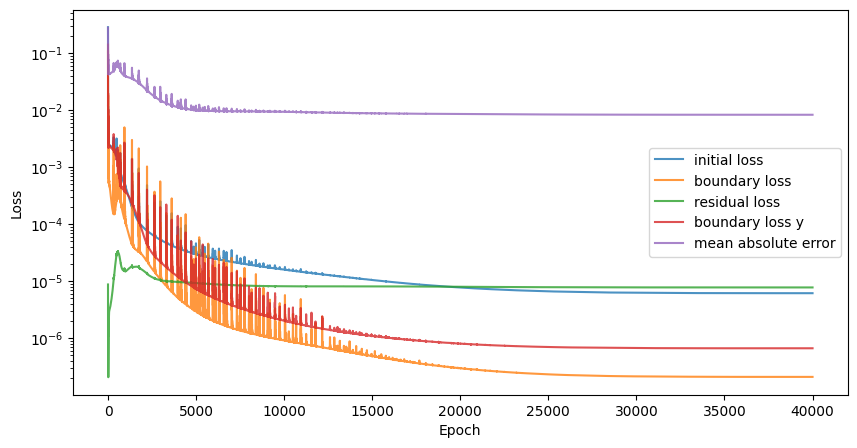

In [17]:
plot_training_loss(history, y_scale='log')

In [18]:
from matplotlib.gridspec import GridSpec
def plot_snapshots(timeList,num_test_samples = 200, cross_sect = 0):

    x_flat = np.linspace(x_start, length, num_test_samples)
    y_flat = np.linspace(y_start, ylength, num_test_samples)
    t_flat = np.linspace(0, time, num_test_samples)
    x_flat = tf.convert_to_tensor(x_flat)
    y_flat = tf.convert_to_tensor(y_flat)
    t_flat = tf.convert_to_tensor(t_flat)

    t_cross_sections = timeList
    for i, t_cs in enumerate(t_cross_sections):
        x, y = np.meshgrid(x_flat, y_flat)
        txy = np.stack([np.full(x.flatten().shape, t_cs), x.flatten(), y.flatten()],axis=-1)


        fig = plt.figure(figsize=(7,4))
        gs = GridSpec(2, 5)
        plt.subplot(gs[0, :])
        # layer = tf.keras.layers.Normalization(axis=None)
        # layer_invert = tf.keras.layers.Normalization(axis=None, invert = True)
        # layer.adapt(txy)
        # txy_norm = layer(txy)
        u = pinn.backbone.predict(txy, batch_size=num_test_samples)
        u = u.reshape(x.shape)
        plt.pcolormesh(x, y, u)
        plt.xlabel('x')
        plt.ylabel('y')
        cbar = plt.colorbar(pad=0.05, aspect=10)
        cbar.set_label('u(t,x)')
        cbar.mappable.set_clim(tf.reduce_min(u), tf.reduce_max(u))
        fig = plt.figure()

        txy2 = np.stack([np.full(t_flat.shape, t_cs),  x_flat , np.full(t_flat.shape, cross_sect)], axis=-1)
        # txy2_norm = layer(txy2)


        u2 = pinn.backbone.predict(txy2, batch_size=num_test_samples)
        uexact = phi_function(txy2)
        # uexact = tf.reshape(uexact, [x_flat.shape[0],x_flat.shape[1]])
        plt.plot(x_flat, u2, label = 'Prediction at time {}'.format(t_cs))
        plt.plot(x_flat, uexact, '.',label = 'Exact at time {}'.format(t_cs))
        plt.xlabel('x')
        plt.ylabel('u(x,y,t)')
        plt.legend()
        plt.title('wave cross section at y = {}'.format(cross_sect))

    return u2, x_flat

1/1 [==============================] - 0s 17ms/step


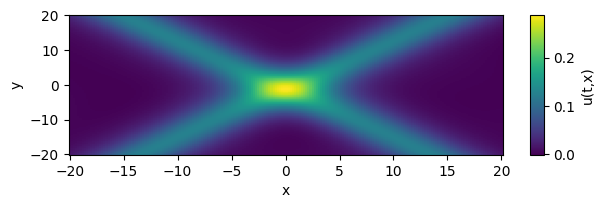

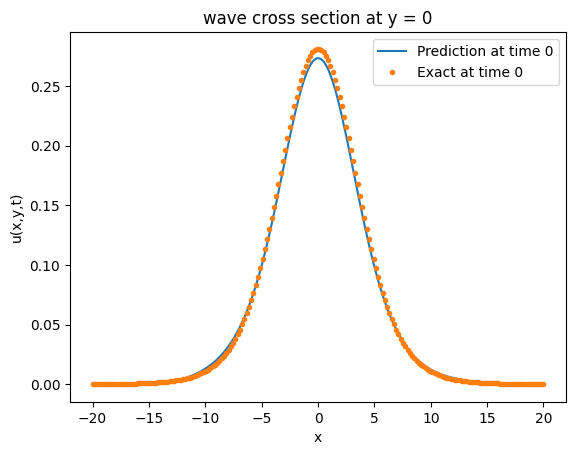

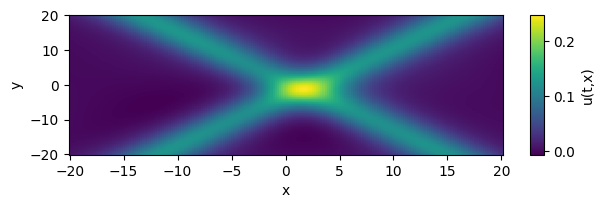

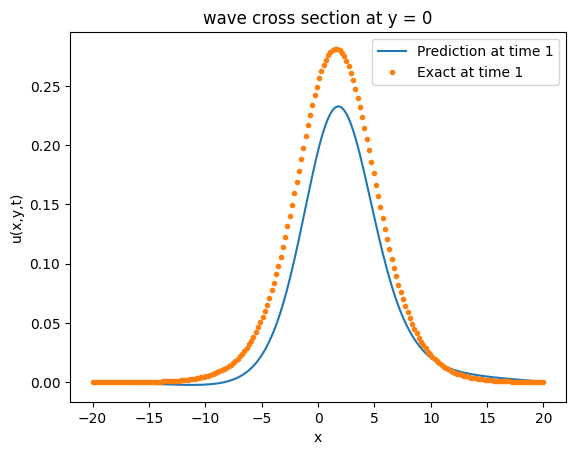

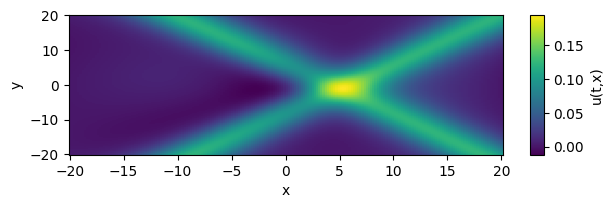

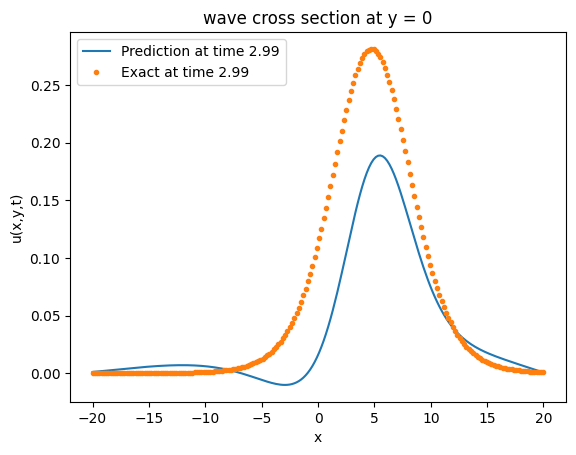

In [19]:
u2pinn, xpinn = plot_snapshots([0,1,2.99], cross_sect = 0)

(1000, 3)


Text(0.5, 1.0, 'wave cross section at y = 0')

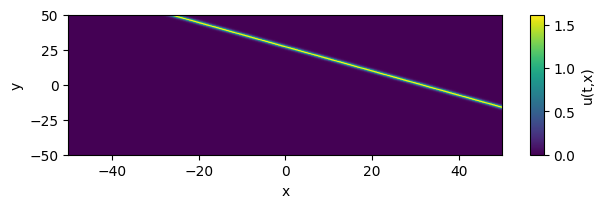

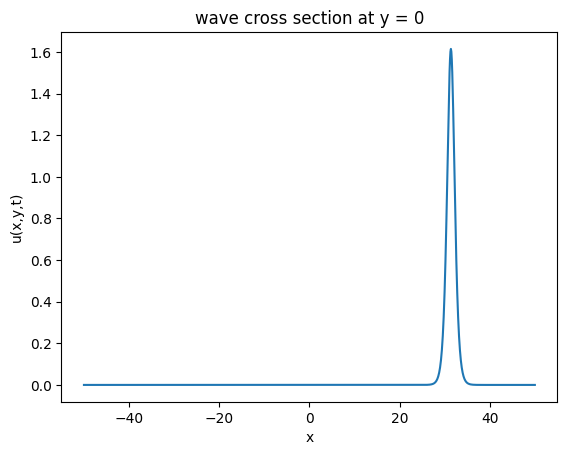

In [ ]:
from matplotlib.gridspec import GridSpec
N = 1000
xt = np.linspace(x_start,length,N).T
yt = np.linspace(x_start,length,N).T
tt = np.zeros((N,1))
xt = xt.reshape(-1,1)
yt = yt.reshape(-1,1)
tt = tt.reshape(-1,1)

txy_test = np.c_[tt,xt,yt]
print(txy_test.shape)
txy_test = tf.convert_to_tensor(txy_test, dtype = 'float32')
txy_test = tf.reshape(txy_test, [N,3])
# (tf.shape(txy_test))
# plt.plot(txy_test[:,1:2], phi_function(txy_test))
TIME = 6
x, y = np.meshgrid(xt, yt)
txy = np.stack([np.full(x.flatten().shape, TIME), x.flatten(), y.flatten()],axis=-1)

fig = plt.figure(figsize=(7,4))
gs = GridSpec(2, 5)
plt.subplot(gs[0, :])

ut = phi_function(txy)
ut = tf.reshape(ut, [x.shape[0],x.shape[1]])
plt.pcolormesh(x, y, ut)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar(pad=0.05, aspect=10)
cbar.set_label('u(t,x)')
cbar.mappable.set_clim( tf.reduce_min(ut), tf.reduce_max(ut))
fig = plt.figure()
cross_sect = 0
txy2 = np.stack([np.full(tt.shape, TIME),  xt , np.full(tt.shape, cross_sect)], axis=1)
u2 = phi_function(txy2)
u2 = tf.reshape(u2, [xt.shape[0],xt.shape[1]])
plt.plot(xt, u2, label = 'prediction at time {}'.format(0))
plt.xlabel('x')
plt.ylabel('u(x,y,t)')
plt.title('wave cross section at y = {}'.format(cross_sect))






In [ ]:
! git add KP.ipynb
! git commit -m "Updating with KPII solution o"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@13d8a82d9429.(none)')
